In [2]:
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt
import modules_TFM as mod

%matplotlib inline

from invisible_cities.io.pmaps_io import load_pmaps
from invisible_cities.io.pmaps_io import load_pmaps_as_df

from ic_course_utils import find_pmap_with_s1_s2

In [3]:
input_file = '/Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_0000_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5'

In [4]:
frames = []
for ifile in range(3503):
    input_file = '/Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_{:04d}_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5'.format(ifile)
    print('Reading file', input_file)

    dt = pd.read_hdf(input_file, '/DST/Events')
    frames.append(dt)
    print('done')
    
kdst = pd.concat(frames)

Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_0000_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_0001_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_0002_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_0003_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_0004_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_0005_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5
done
Reading file /Volumes/EXTERNAL_US/NEXT/Data/14912/sophronia/trigger0/ldc1/run_14912_0006_ldc1_trg0.v2.3.1.20250219.KrDesman.sophronia.h5
done
Readin

In [53]:
data = kdst[(kdst.DT > 0) & (kdst.DT < 1400) & (kdst.S1e > 5 ) & (kdst.Zrms < 20)]

In [54]:
kdst

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,2,1.741359e+09,0,0,3,1,225.0,2.720006,11.809676,1421575.0,...,25,192.902512,192.902512,7.744405,-143.082917,46.410001,150.421439,2.827942,18.435430,18.271520
1,2,1.741359e+09,1,0,3,1,225.0,1.211622,7.131742,1445975.0,...,25,168.502502,168.502502,7.744405,-143.082917,46.410001,150.421439,2.827942,18.435430,18.271520
2,2,1.741359e+09,2,0,3,1,775.0,1.433418,21.244514,1446550.0,...,25,167.927505,167.927505,7.744405,-143.082917,46.410001,150.421439,2.827942,18.435430,18.271520
3,30,1.741359e+09,0,0,3,1,375.0,2.469869,18.515942,1321050.0,...,15,283.439880,283.439880,3.058372,-95.260776,191.840847,214.190397,2.031689,13.428771,13.657913
4,30,1.741359e+09,1,0,3,1,825.0,1.680931,21.827774,1321525.0,...,15,282.964874,282.964874,3.058372,-95.260776,191.840847,214.190397,2.031689,13.428771,13.657913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,4045806,1.741450e+09,2,0,3,1,325.0,1.449584,10.576148,1577650.0,...,15,18.845501,18.845501,6.009185,-98.457520,-51.207210,110.977753,-2.661999,15.129810,16.217311
260,4045813,1.741450e+09,0,0,1,1,225.0,1.466760,8.851491,942100.0,...,17,659.388916,659.388916,4.591936,77.438814,-56.900340,96.095882,-0.633688,15.415158,14.931030
261,4045820,1.741450e+09,0,0,2,1,175.0,1.630073,9.979224,835175.0,...,15,768.302429,768.302429,5.229458,-46.438657,23.148681,51.888441,2.679163,14.033179,15.508977
262,4045820,1.741450e+09,1,0,2,1,150.0,2.735780,9.916533,836150.0,...,15,767.327393,767.327393,5.229458,-46.438657,23.148681,51.888441,2.679163,14.033179,15.508977


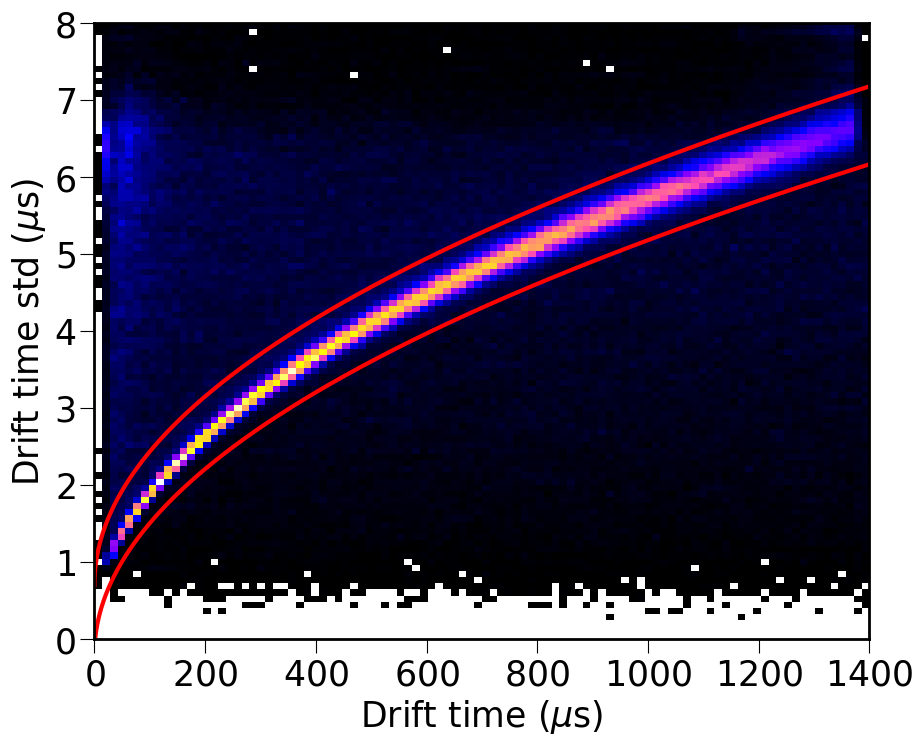

In [56]:
plt.hist2d(data.DT, data.Zrms, bins=(100, 100), range = [(0,1400), (0,8)], cmin =1);

f  = lambda x,a,b: a+b*x**0.5
f1 = lambda x: f(x, 0.7, 0.173)
f2 = lambda x: f(x, -0.2, 0.17)

x=np.linspace(0, max(data.DT),len(data.Zrms))

plt.plot(x,f1(x), color='red');
plt.plot(x,f2(x), color='red'); 


plt.xlabel(r'Drift time ($\mu$s)');
plt.ylabel(r'Drift time std ($\mu$s)');

In [57]:
DT_raw=data.DT
DTrms_raw=data.Zrms
mask=(DTrms_raw<f1(DT_raw))&(DTrms_raw>f2(DT_raw))
inverse_mask=~mask

dst_in=data[mask]
dst_out=data[inverse_mask & (DT_raw>0)]

def recompute_npeaks(df):
    events= df.groupby('event')
    ns1= events.s1_peak.nunique().values
    ns2= events.s2_peak.nunique().values
    n = events.s1_peak.count ().values
    df.loc[:, 'nS1'] = np.repeat(ns1,n) 
    df.loc[:, 'nS2']= np.repeat(ns2,n)
    return df

In [58]:
dst_inr=recompute_npeaks(dst_in)
dst=dst_inr[(dst_inr.nS1==1) & (dst_inr.nS2==1)]

dst.to_hdf('data_kdst_merged_14912.h5', key='dataset', mode='w') 

/Users/pablovazquez/miniconda/envs/IC-3.8-2024-06-08/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


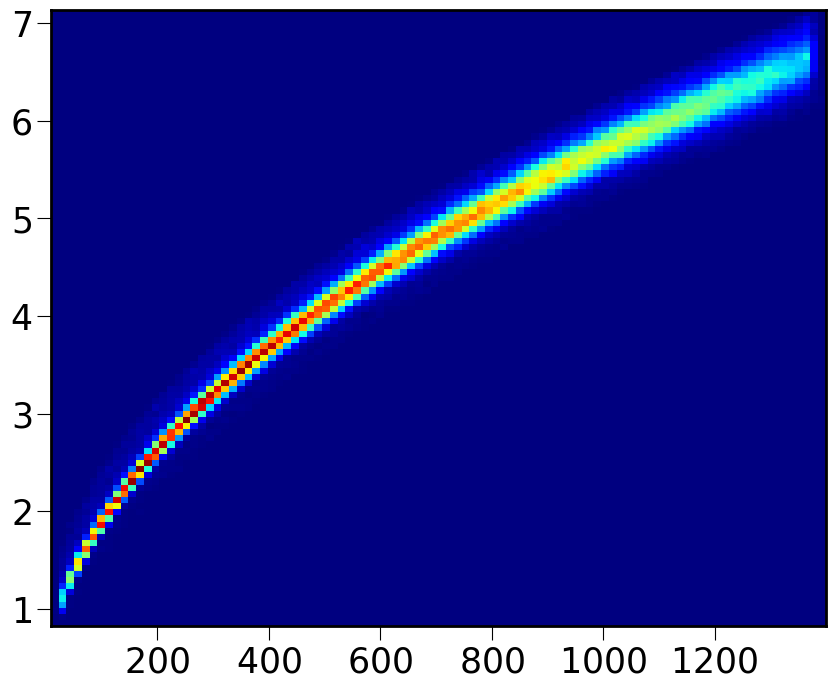

In [59]:
plt.hist2d(dst.DT, dst.Zrms, bins = (100,100), cmin = 0, cmap = 'jet');

In [60]:
color_sequence = ("k", "m", "g", "b", "r",
                  "gray", "aqua", "gold", "lime", "purple",
                  "brown", "lawngreen", "tomato", "lightgray", "lightpink")

def auto_plot_style(overrides = dict()):
    from cycler import cycler
    plt.rcParams[ "figure.figsize"               ] = 10, 8
    plt.rcParams[   "font.size"                  ] = 25
    plt.rcParams[  "lines.markersize"            ] = 25
    plt.rcParams[  "lines.linewidth"             ] = 3
    plt.rcParams[  "patch.linewidth"             ] = 3
    plt.rcParams[   "axes.linewidth"             ] = 2
    plt.rcParams[   "grid.linewidth"             ] = 3
    plt.rcParams[   "grid.linestyle"             ] = "--"
    plt.rcParams[   "grid.alpha"                 ] = 0.5
    plt.rcParams["savefig.dpi"                   ] = 300
    plt.rcParams["savefig.bbox"                  ] = "tight"
    plt.rcParams[   "axes.formatter.use_mathtext"] = True
    plt.rcParams[   "axes.formatter.limits"      ] = (-3 ,4)
    plt.rcParams[  "xtick.major.size"            ] = 10
    plt.rcParams[  "ytick.major.size"            ] = 10
    plt.rcParams[  "xtick.minor.size"            ] = 5
    plt.rcParams[  "ytick.minor.size"            ] = 5
    plt.rcParams[   "axes.prop_cycle"            ] = cycler(color=color_sequence)
    plt.rcParams[  "image.cmap"                  ] = "gnuplot2"
    plt.rcParams.update(overrides)

auto_plot_style()

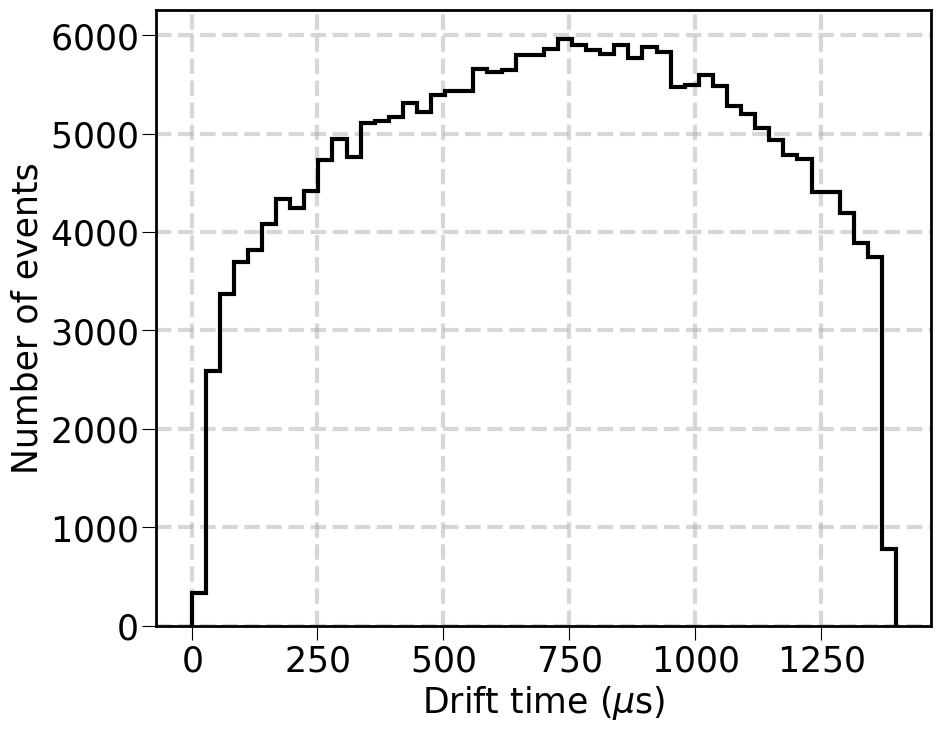

In [61]:
weight = np.ones(len(dst.DT))/(np.max(dst.time)-np.min(dst.time))

counts, bins_edges, _ = plt.hist(dst.DT, bins =50, histtype = 'step',range = (0, 1400))
plt.grid(True);
plt.xlabel(r'Drift time ($\mu$s)');
plt.ylabel(r'Number of events');



In [34]:
print('La presion reducida es:',4/58.42)
print(r'La temperatura reducida es, suponiendo T=25C:', (273.15+25)/289.733)

print('El factor de compresibilidad es entonces:', 0.971)


P=4
T=25
Z=0.971

La presion reducida es: 0.06846970215679561
La temperatura reducida es, suponiendo T=25C: 1.029050884780125
El factor de compresibilidad es entonces: 0.971


In [12]:
def diffusion_coef(T,Z,vd,P,DL):
    T0=293.15
    Z0=0.961
    dif=np.sqrt((2*T0*Z0*P*DL)/(T*Z*vd))
    return dif

def conversion_unidades(coefficient):
    '''
        Returns the diffusion coefficient in um/sqrt(cm)
    '''
    return coefficient * 10**3 * 10**(1/2)

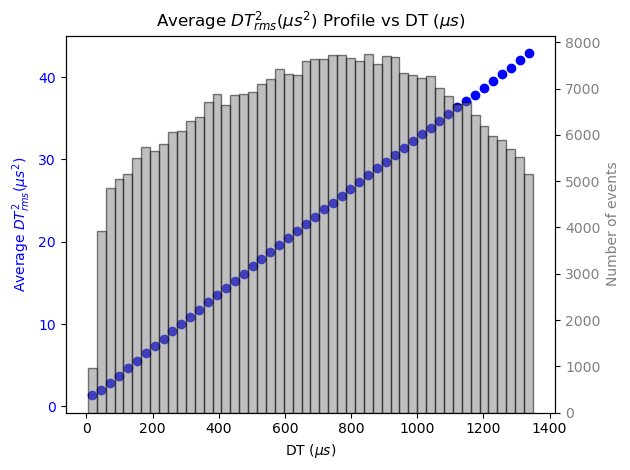

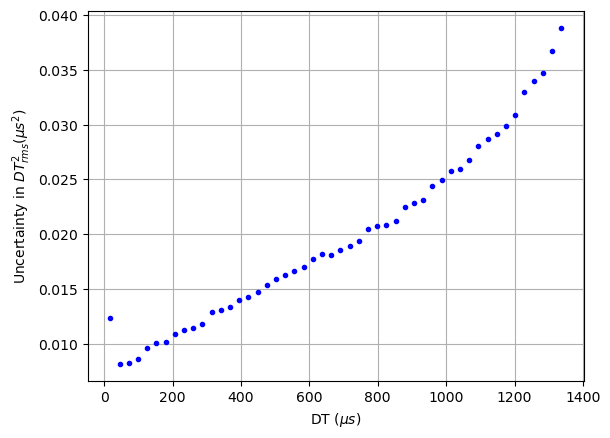

In [13]:
DT_prof, Z_rms_mean_sq, Z_rms_mean_sq_rms = mod.profiles(dst_in['DT'], dst_in['Zrms']**2, threshold=0, x_label
                                                         =r'DT ($\mu s$)', y_label=r'$DT_{r ms}^2 (\mu s ^2)$',plot=True, normalize=True);

In [14]:
drift_velocity=0.865 # mm/ mu s !!!!!
profile_data_L=mod.Data1d(DT_prof, Z_rms_mean_sq, Z_rms_mean_sq_rms)

In [15]:
def recta(x, a, b):
    return a*x+b

profile_data_L.fit(recta, p0=[0,0]);

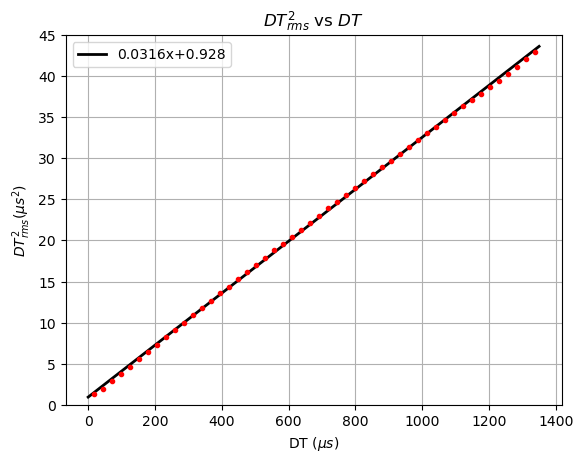

In [16]:
profile_data_L.plot()
plt.plot(np.linspace(0,1350,1000), recta(np.linspace(0,1350,1000), profile_data_L.fit(recta, p0=[0,0])[0][0],
                                        profile_data_L.fit(recta, p0=[0,0])[0][1]), linewidth=2, color='black',
                                        label=f'{np.round(profile_data_L.fit(recta, p0=[0,0])[0][0],4)}x+{np.round(profile_data_L.fit(recta, p0=[0,0])[0][1],4)}')
plt.xlabel(r'DT ($\mu s)$')
plt.ylabel(r'$DT_{rms}^2 (\mu s^2)$')
plt.ylim(0,45)
plt.title(r'$DT_{rms}^2$ vs $DT$ ')
plt.legend(loc='upper left')
plt.grid(True)

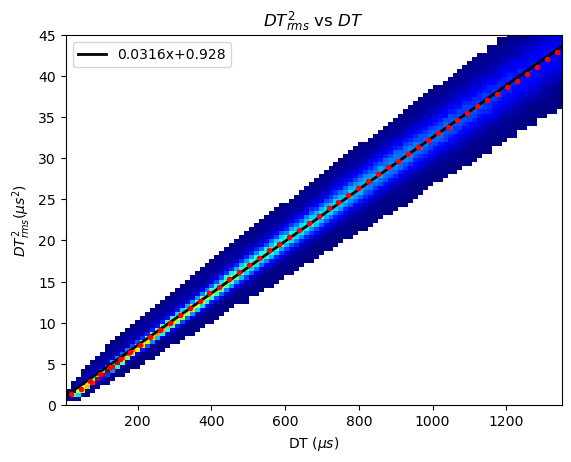

In [17]:
plt.hist2d(dst.DT, dst.Zrms**2, bins = (100,100), cmin = 1, cmap = 'jet');
profile_data_L.plot()
plt.plot(np.linspace(0,1350,1000), recta(np.linspace(0,1350,1000), profile_data_L.fit(recta, p0=[0,0])[0][0],
                                        profile_data_L.fit(recta, p0=[0,0])[0][1]), linewidth=2, color='black',
                                        label=f'{np.round(profile_data_L.fit(recta, p0=[0,0])[0][0],4)}x+{np.round(profile_data_L.fit(recta, p0=[0,0])[0][1],4)}');

plt.xlabel(r'DT ($\mu s)$')
plt.ylabel(r'$DT_{rms}^2 (\mu s^2)$')
plt.ylim(0,45)
plt.title(r'$DT_{rms}^2$ vs $DT$ ')
plt.legend(loc='upper left')

In [18]:
slope_L=profile_data_L.fit(recta,p0=(0,0))[0][0]
incert_slope_L=np.sqrt(profile_data_L.fit(recta,p0=(0,0))[1][0,0])

print(slope_L)
print(incert_slope_L)

0.03163132298211647
7.635196656105644e-05


In [19]:
slope = slope_L

def incert_Dl(incer_slope, incert_vd, vd, slope):
    a = (vd*slope*incert_vd)**2
    b = (incer_slope/2*vd**2)**2
    return np.sqrt(a+b)

def incert_Dlstar(incert_Dl, incert_vd, vd, DL):
    T0  = 293.15
    Z0  = 0.961
    cte = np.sqrt((2*T0*Z0*P)/(T*Z))

    a = (1/4/vd/DL*cte)*incert_Dl**2
    b = (1/4/vd**3/DL*cte)*incert_vd**2

    return np.sqrt(a+b)

DL=slope*drift_velocity**2/2
DL=conversion_unidades(diffusion_coef(293.15, 0.971, drift_velocity, 4, DL))/2
iDL = incert_Dl(incert_slope_L, 0.00016, drift_velocity, slope)
iDLstar = incert_Dlstar(iDL, 0.00016, drift_velocity, slope*drift_velocity**2/2)/2
print(f'{DL} +- {conversion_unidades(iDLstar)}')

print()
print(f'A campo reducido {114.45/3.96}')

520.3778602051093 +- 4.540967455374107

A campo reducido 28.901515151515152


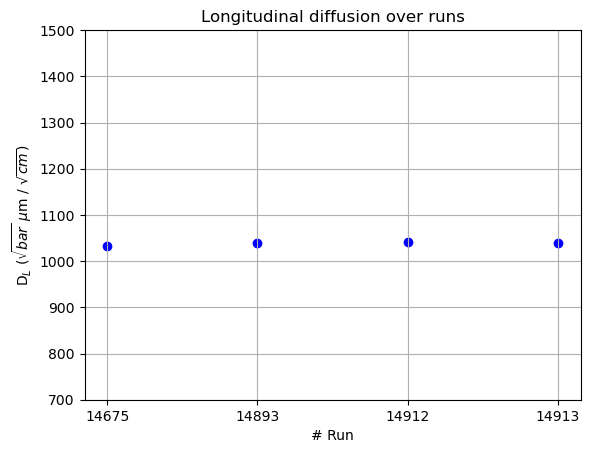

In [20]:
difusiones_L = [1032.8257 ,1039.3547, 1040.7557, 1039.3229]
run = [14675, 14893, 14912, 14913]

x_positions = range(len(run))  

plt.scatter(x_positions, difusiones_L, color='blue', label='Datos')

plt.ylim(700, 1500)

plt.xticks(x_positions, run);

plt.xlabel('# Run');
plt.ylabel(r'D$_L$ ($\sqrt{bar}$ $\mu$m / $\sqrt{cm}$)')
plt.title('Longitudinal diffusion over runs')
plt.grid(True)


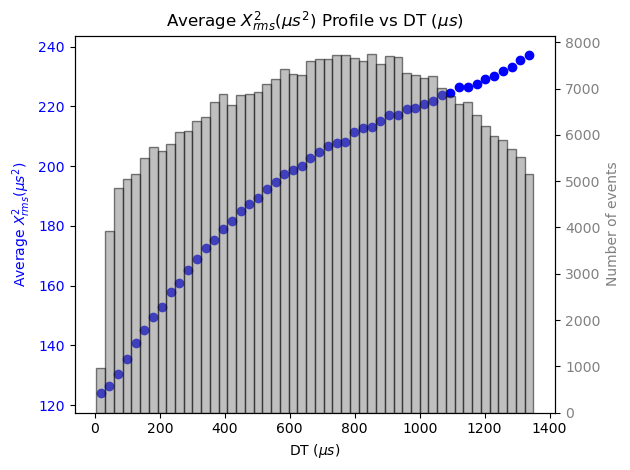

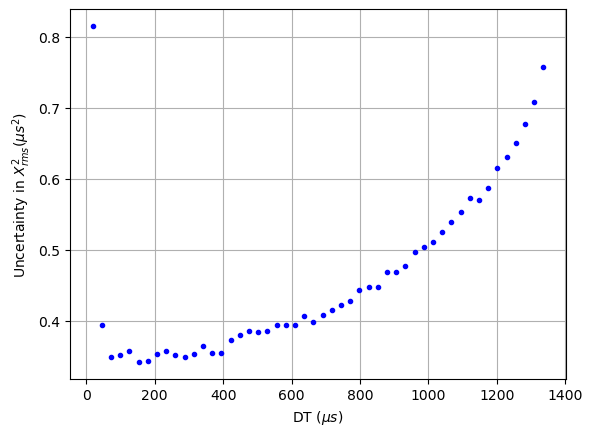

In [21]:
DT_prof_T, X_rms_mean_sq, X_rms_mean_sq_rms = mod.profiles(dst_in['DT'], dst_in['Xrms']**2, threshold=0, x_label
                                                         =r'DT ($\mu s$)', y_label=r'$X_{r ms}^2 (\mu s ^2)$',plot=True, normalize=True);

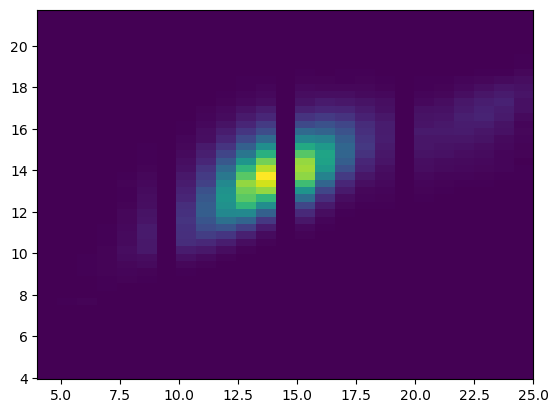

In [22]:
plt.hist2d(dst_in.Nsipm, dst_in.Xrms, bins = (25, 50));

In [23]:
dst_in

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
3,30,1.741359e+09,0,0,3,1,375.0,2.469869,18.515942,1321050.0,...,15,283.439880,283.439880,3.058372,-95.260776,191.840847,214.190397,2.031689,13.428771,13.657913
4,30,1.741359e+09,1,0,3,1,825.0,1.680931,21.827774,1321525.0,...,15,282.964874,282.964874,3.058372,-95.260776,191.840847,214.190397,2.031689,13.428771,13.657913
5,30,1.741359e+09,2,0,3,1,300.0,1.581401,8.524598,1328400.0,...,15,276.089874,276.089874,3.058372,-95.260776,191.840847,214.190397,2.031689,13.428771,13.657913
10,65,1.741359e+09,0,1,3,2,150.0,2.282323,9.254589,878100.0,...,14,948.371521,948.371521,5.932376,-130.624035,14.534822,131.430208,3.030776,13.696340,13.894217
12,65,1.741359e+09,1,1,3,2,150.0,2.072927,7.814672,878725.0,...,14,947.746521,947.746521,5.932376,-130.624035,14.534822,131.430208,3.030776,13.696340,13.894217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,4045806,1.741450e+09,0,0,1,1,250.0,1.328924,8.473248,486750.0,...,15,1109.745605,1109.745605,6.009185,-98.457520,-51.207210,110.977753,-2.661999,15.129810,16.217311
260,4045813,1.741450e+09,0,0,1,1,225.0,1.466760,8.851491,942100.0,...,17,659.388916,659.388916,4.591936,77.438814,-56.900340,96.095882,-0.633688,15.415158,14.931030
261,4045820,1.741450e+09,0,0,2,1,175.0,1.630073,9.979224,835175.0,...,15,768.302429,768.302429,5.229458,-46.438657,23.148681,51.888441,2.679163,14.033179,15.508977
262,4045820,1.741450e+09,1,0,2,1,150.0,2.735780,9.916533,836150.0,...,15,767.327393,767.327393,5.229458,-46.438657,23.148681,51.888441,2.679163,14.033179,15.508977


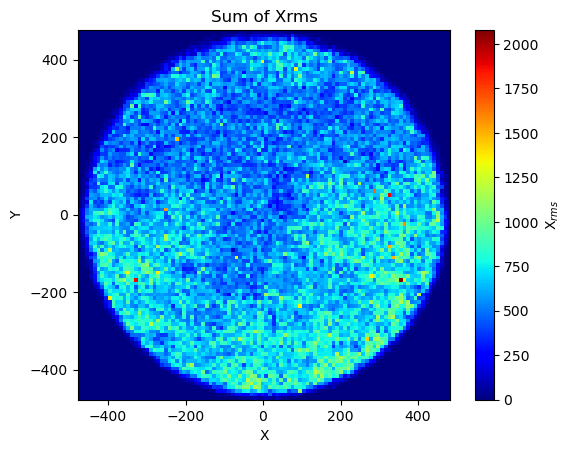

In [24]:
hist_sum, xedges, yedges = np.histogram2d(dst_in.X, dst_in.Y, bins=(100, 100), weights=dst_in.Xrms)

plt.imshow(hist_sum.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label = r'X$_{rms}$')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sum of Xrms')
plt.show()

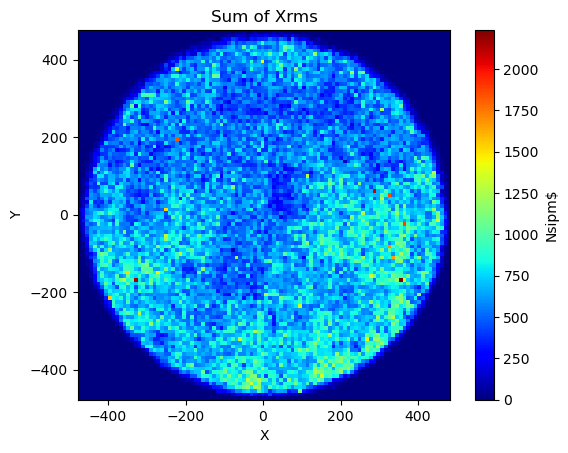

In [25]:
hist_sum, xedges, yedges = np.histogram2d(dst_in.X, dst_in.Y, bins=(100, 100), weights=dst_in.Nsipm)

plt.imshow(hist_sum.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label = r'Nsipm$')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sum of Xrms')
plt.show()

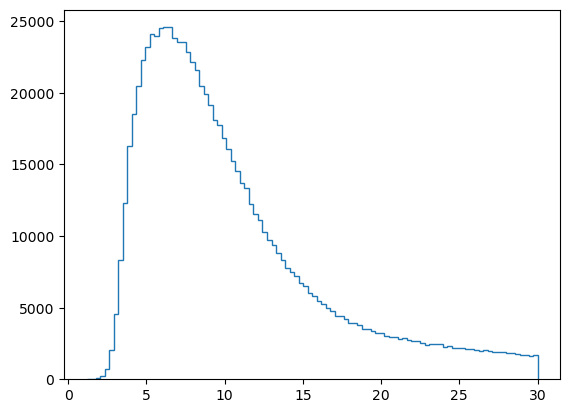

In [26]:
plt.hist(kdst.S1e, bins = 100, histtype = 'step');

In [27]:
6.582*10**-22/20.25

3.2503703703703703e-23